# ANÁLISIS DATOS DE ESTRUCTURA INTERNA DE NANOPARTÍCULAS DE ORO
### EDA
#### Autora: Josefina Cresta

### OBJETIVOS:

Realizar un análisis exploratorio de datos sobre la estructura atómica interna de nanopartículas de oro ya que es un punto crítico para la comprensión de sus propiedades físicas y químicas. Para esto se investiga la base de datos obtenidad de [CSICO](https://data.csiro.au/collection/csiro:40669) con el objetivo de afirmar la hipótesis de que a pesar que las propiedades de las nanopartículas de oro son considerablemente diferentes a a las propiedades del oro sólido, a partir de ahora oro en bulk, las características estructurales internas de estas dos configuraciones coinciden. 


### DESCRIPCIÓN Y LIMPIEZA DE LA BASE DE DATOS

### Importación de librerías y funciones necesarias:

In [2]:
# Para tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np
import random 

# Para Estadisticas y Gráficos
# ==============================================================================
import scipy.stats as ss
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from matplotlib import style
import seaborn as sns

# Impotación de funciones propias
# ==============================================================================
from utils.funs import *


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

### Importación de base de datos

In [3]:
data_Au = pd.read_csv("data/Au_nanoparticle_dataset.csv")

### Exploración inicial del dataframe

Tamaño

*Tupla de: (filas, columnas)*

In [4]:
data_Au.shape

(4000, 185)

Primeras filas

In [5]:
data_Au.head()

,ID,T,tau,time,N_total,N_bulk,N_surface,Volume,R_min,R_max,...,q6q6_S14,q6q6_S15,q6q6_S16,q6q6_S17,q6q6_S18,q6q6_S19,q6q6_S20,q6q6_S20+,Total_E,Formation_E
0,1,273,0.000025,1,1599,1014,585,2.710000e-26,15.5898,19.4516,...,0,0,0,0,0,0,0,0,-5908.6345,343.4555
1,2,273,0.000025,2,1642,1034,608,2.780000e-26,15.3996,24.1755,...,0,0,0,0,0,0,0,0,-6035.4034,384.8166
2,3,273,0.000025,3,4637,3365,1272,7.850000e-26,21.9199,31.0305,...,0,0,0,0,0,0,0,0,-17330.1660,800.5040
3,4,273,0.000025,4,7189,5292,1897,1.220000e-25,23.2542,37.8795,...,0,0,0,0,0,0,0,0,-26937.2010,1171.7890
4,5,273,0.000025,5,11004,8508,2496,1.860000e-25,27.1200,39.7614,...,0,0,0,0,0,0,0,0,-41427.9010,1597.7390


Últimas filas

In [6]:
data_Au.tail()

,ID,T,tau,time,N_total,N_bulk,N_surface,Volume,R_min,R_max,...,q6q6_S14,q6q6_S15,q6q6_S16,q6q6_S17,q6q6_S18,q6q6_S19,q6q6_S20,q6q6_S20+,Total_E,Formation_E
3995,3996,973,0.00025,6,1509,950,559,2.550000e-26,13.8048,23.1729,...,0,0,0,0,0,0,0,0,-5346.9589,553.2311
3996,3997,973,0.00025,7,2315,1469,846,3.920000e-26,12.0020,36.7573,...,0,0,0,0,0,0,0,0,-8218.1252,833.5248
3997,3998,973,0.00025,8,2764,1905,859,4.680000e-26,18.8611,24.6101,...,0,0,0,0,0,0,0,0,-9876.2899,930.9501
3998,3999,973,0.00025,9,3148,2199,949,5.330000e-26,18.7624,26.0008,...,0,0,0,0,0,0,0,0,-11261.0810,1047.5990
3999,4000,973,0.00025,10,3986,2785,1201,6.750000e-26,19.1334,44.7678,...,0,0,0,0,0,0,0,0,-14264.3970,NaN


Sample

In [7]:
data_Au.sample(5)

,ID,T,tau,time,N_total,N_bulk,N_surface,Volume,R_min,R_max,...,q6q6_S14,q6q6_S15,q6q6_S16,q6q6_S17,q6q6_S18,q6q6_S19,q6q6_S20,q6q6_S20+,Total_E,Formation_E
1918,1919,573,0.000050,9,13750,11096,2654,2.330000e-25,33.9215,41.8516,...,0,0,0,0,0,0,0,0,-51743.5440,2018.9560
3829,3830,923,0.000075,10,13051,10525,2526,2.210000e-25,33.6537,40.5665,...,0,0,0,0,0,0,0,0,-47416.2290,3613.1810
964,965,373,0.000175,5,2014,1269,745,3.410000e-26,14.6474,25.5875,...,0,0,0,0,0,0,0,0,-7437.3443,437.3957
581,582,323,0.000000,10,1954,1239,715,3.310000e-26,16.4005,21.7097,...,0,0,0,0,0,0,0,0,-7179.1836,460.9564
933,934,373,0.000100,4,3206,2116,1090,5.430000e-26,17.6662,37.9949,...,0,0,0,0,0,0,0,0,-11847.7170,687.7430


Resumen de información del DataFrame, con metodo `.info()` de *Pandas*

Informacion general de los datos de cada cloumna
* Indica el numero de filas del dataset
* Muestra el numero de datos No Nulos por columna (valores validos)
* Tipo de dato de cada columna
* Tamaño total del dataset
df.info()*

In [8]:
data_Au.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Columns: 185 entries, ID to Formation_E
dtypes: float64(23), int64(162)
memory usage: 5.6 MB


Se observan todos valores numericos sin datos Nulos.

Tipos de datos que existen en las columnas del dataframe

In [9]:
data_Au.dtypes

ID               int64
T                int64
tau            float64
time             int64
N_total          int64
                ...   
q6q6_S19         int64
q6q6_S20         int64
q6q6_S20+        int64
Total_E        float64
Formation_E    float64
Length: 185, dtype: object

In [10]:
data_Au.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

Analisis de las columnas disponibles

In [11]:
print(data_Au.columns.tolist())

['ID', 'T', 'tau', 'time', 'N_total', 'N_bulk', 'N_surface', 'Volume', 'R_min', 'R_max', 'R_diff', 'R_avg', 'R_std', 'R_skew', 'R_kurt', 'S_100', 'S_111', 'S_110', 'S_311', 'Curve_1-10', 'Curve_11-20', 'Curve_21-30', 'Curve_31-40', 'Curve_41-50', 'Curve_51-60', 'Curve_61-70', 'Curve_71-80', 'Curve_81-90', 'Curve_91-100', 'Curve_101-110', 'Curve_111-120', 'Curve_121-130', 'Curve_131-140', 'Curve_141-150', 'Curve_151-160', 'Curve_161-170', 'Curve_171-180', 'Avg_total', 'Avg_bulk', 'Avg_surf', 'TCN_0', 'TCN_1', 'TCN_2', 'TCN_3', 'TCN_4', 'TCN_5', 'TCN_6', 'TCN_7', 'TCN_8', 'TCN_9', 'TCN_10', 'TCN_11', 'TCN_12', 'TCN_13', 'TCN_14', 'TCN_15', 'TCN_16', 'TCN_17', 'TCN_18', 'TCN_19', 'TCN_20', 'BCN_0', 'BCN_1', 'BCN_2', 'BCN_3', 'BCN_4', 'BCN_5', 'BCN_6', 'BCN_7', 'BCN_8', 'BCN_9', 'BCN_10', 'BCN_11', 'BCN_12', 'BCN_13', 'BCN_14', 'BCN_15', 'BCN_16', 'BCN_17', 'BCN_18', 'BCN_19', 'BCN_20', 'SCN_0', 'SCN_1', 'SCN_2', 'SCN_3', 'SCN_4', 'SCN_5', 'SCN_6', 'SCN_7', 'SCN_8', 'SCN_9', 'SCN_10', 'SCN

Descripción con metodo `describe()` de *Pandas*

Resumen de la estadistica descriptiva general de las columnas numericas del dataframe, presenta la informacion de:

* Promedio (mean)
* Desviacion estandard (std)
* Valor minimo
* Valor maximo
* Cuartiles (25%, 50% y 75%)

In [12]:
data_Au.describe(include=None)

,ID,T,tau,time,N_total,N_bulk,N_surface,Volume,R_min,R_max,...,q6q6_S14,q6q6_S15,q6q6_S16,q6q6_S17,q6q6_S18,q6q6_S19,q6q6_S20,q6q6_S20+,Total_E,Formation_E
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4.000000e+03,4000.000000,4000.000000,...,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.000000,3999.000000
mean,2000.500000,615.000000,0.000055,8.200000,3476.786500,2521.550250,955.23625,5.885368e-26,16.436127,26.028875,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-12742.661846,851.456017
std,1154.844867,223.625808,0.000081,2.856929,3679.286769,2976.232459,721.87022,6.227819e-26,6.761951,9.822659,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13690.999369,771.374794
min,1.000000,273.000000,0.000000,1.000000,236.000000,89.000000,137.00000,4.000000e-27,0.519100,9.665200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-53772.854000,86.063950
25%,1000.750000,410.500000,0.000000,7.000000,1061.000000,618.750000,437.00000,1.800000e-26,11.898975,18.570825,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-16504.678000,334.712750
50%,2000.500000,598.000000,0.000000,10.000000,1867.000000,1199.000000,666.00000,3.160000e-26,14.914300,22.978850,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-6754.782950,553.231100
75%,3000.250000,785.500000,0.000100,10.000000,4503.000000,3183.000000,1301.75000,7.620000e-26,19.352375,34.207525,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3786.450450,1107.268000
max,4000.000000,973.000000,0.000250,10.000000,14277.000000,11580.000000,3190.00000,2.420000e-25,35.136500,66.289500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-783.428590,4470.351000


Esta base de datos es enorme por lo que se procede a dividirla y a quitar las columnas que no se utilizaran

### División del dataframe

Es posible realizar una separación de la base de datos según el tipo de carcteristicas que describe cada variable. Se agrupan en 3 conjuntos diferentes que capturan diferentes tipos de información sobre las nanopartículas. Los 3 conjuntos de características se denominan Bulk (B), Superficiales (S) y Totales (T). El conjunto de características de bulk solo contendrá características que pertenecen a los átomos interiores, incluidos los números de coordinación, los tipos de red y los parámetros de orden. El segundo conjunto solo contiene características que pertenecen a los átomos exteriores, incluidos los números de coordinación, las orientaciones de las facetas de la superficie y los rangos de curvaturas de la superficie. El conjunto de características totales solo contiene características que involucran medidas globales (como el radio de nanopartículas), promedios y números de coordinación y parámetros de orden calculados sobre todos los átomos en la partícula.

In [13]:
totales = [i for i in data_Au if (i.startswith('T')) | ("TCN_" in i) | ("_T" in i)]
bulk = [i for i in data_Au if (i.startswith('B')) | ("BCN_" in i) | ("_B" in i)]
super = [i for i in data_Au if (i.startswith('S')) | ("SCN_" in i) | ("_S" in i)]


In [14]:
data_total = data_Au[totales]
data_bulk = data_Au[bulk]
data_super = data_Au[super]

In [15]:
data_total.to_csv("./data/subdata/data_total.csv", index=False)
data_bulk.to_csv("./data/subdata/data_bulk.csv", index=False)
data_super.to_csv("./data/subdata/data_super.csv", index=False)

Finalmente, el conjunto principal contiene una combinación de varias funciones de los conjuntos de bulk, de superficie y totales, que serán de principal interés en el presente trabajo en el momento de realizar el análisis de datos sobre las nanopartículas. 

Se seleccionan las columnas que se utilizarán en el analisis principal y se traducen al español sus etiquetas

In [53]:
cols=['ID', 'T', 'tau', 'time', 'N_total', 'N_bulk', 'N_surface', 'Volume', 'R_avg','Avg_total', 'Avg_bulk', 'Avg_surf', 'N_bonds', 'Avg_bonds', 'Total_E']
data_principal=data_Au[cols]

In [54]:
#Lista de variables locales
cols=['ID', 'T', 'tau', 'time', 'N_total', 'N_bulk', 'N_surface', 'Volume', 'R_avg','Avg_total', 'Avg_bulk', 'Avg_surf', 'N_bonds', 'Avg_bonds', 'Total_E']

#Diccionario de traduccioón
traduccion={"ID":           "ID",
            "T":            "Temp",
            "tau":          "Crecimiento", 
            "time":         "Tiempo",
            "N_total":      "N_total",
            "N_bulk":       "N_bulk",
            "N_surface":    "N_super", 
            "Volume":       "Volumen",
            "R_avg":        "Radio",
            "Avg_total":    "Coord_all",
            "Avg_bulk":     "Coord_bulk",
            "Avg_surf":     "Coord_super",
            "N_bonds":      "N_enlaces",
            "Avg_bonds":    "Long_enlaces",
            "Total_E":      "Total_E",
}

In [55]:
data_principal = data_principal[cols].rename(columns=traduccion)

Se agrega una columna con el cálculo de energía por átomo que será de gran utilidad en la parte final del análisis

In [56]:
data_principal["E_atomo"]=data_Au.Total_E/data_Au.N_total

In [57]:
data_principal.to_csv("./data/subdata/data_principal.csv", index=False)

## Analisis de data principal

Se denomina nanomateriales a aquellos materiales que miden entre 1 y 100 nm en al menos una de sus dimensiones. En particular, las nanopartículas (NPs) son aquéllos nanomateriales que poseen menos de 100 nm en todas sus dimensiones. 

In [21]:
print("Radio máximo de todos los radios máximos: ", data_Au["R_max"].max(), "nm")
print("Volumen máximo", data_Au["Volume"].max(), "m^3")

Radio máximo de todos los radios máximos:  66.2895 nm
Volumen máximo 2.42e-25 m^3


Se comprueba que cantidad de átomos conforman las nanoparticulas presentes en la base de datos

In [22]:
print("Las nanoparticulas poseen de ", data_principal["N_total"].min(), "hasta", data_principal["N_total"].max(), "átomos")

Las nanoparticulas poseen de  236 hasta 14277 átomos


# Análisis de las características internas

### LONGITUD ENLACE

Esta variable es continua y mide la distancia promedio entre átomos dentro de cada nanopartícula.

A continuación se realiza contraste de hipótesis para  validar o invalidar la afirmación de que las distintas longitudes de enlace sigue una distribución normal. 

Luego hallar la longitud media para compararla con la longitud media de enlace del oro en Bulk.

In [23]:
long_enlace=data_principal.Long_enlaces

### Normalidad

D'Agostino's K2 test:
	 Estadístico = 406.901495997706, p-value = 4.389982661860902e-89
P_Valor < 0.05 -> Se rechaza H0 
	  No es posible asegurar que Long_enlaces sigue una distribución normal.
********************************************************************************


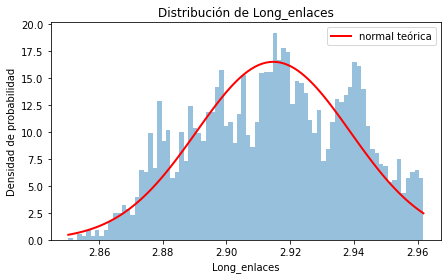

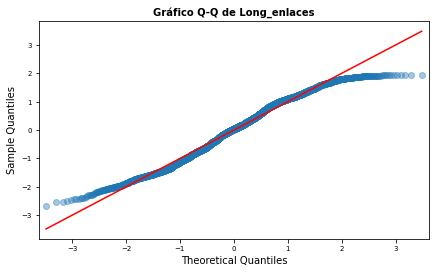

In [24]:
Test_Normalidad(data_principal, 'Long_enlaces')

Para el análisis de normalidad se observa que un histograma con la curva de una distribución normal con la misma media y desviación estándar que los datos disponibles superpuesta, la distribución tiende a la normalidad. 

Pero verificando con el test $k^2$ de D'Agostino  se halla un P-valo nulo lo que indica que hay que rechazar la hipótesis nula y no es posible asegurar que la variable longitud de enlace sigue una distribución normal. 

Con un gráfico de cuantiles teóricos (Gráficos Q-Q), es posible observar que los datos se desvían de la recta que indica normalidad. 


Se procede a  detectar valores atípicos (outliers)

### Outliers

********************************************************************************
Se encontraron 0 outliers de Long_enlaces
********************************************************************************


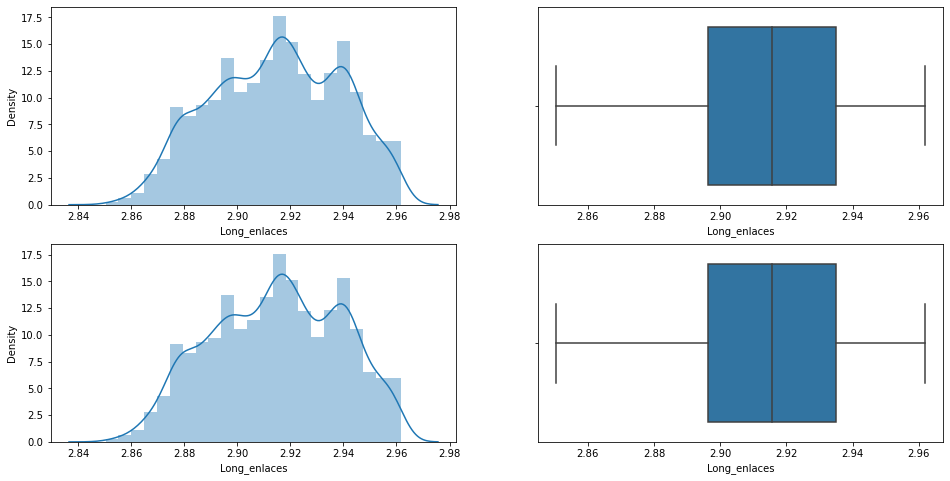

,ID,Temp,Crecimiento,Tiempo,N_total,N_bulk,N_super,Volumen,Radio,Coord_all,Coord_bulk,Coord_super,N_enlaces,Long_enlaces,Total_E,E_atomo
0,1,273,0.000025,1,1599,1014,585,2.710000e-26,17.3706,11.1770,12.5552,8.7880,8936,2.92220,-5908.6345,-3.695206
1,2,273,0.000025,2,1642,1034,608,2.780000e-26,17.6061,11.0719,12.4952,8.6513,9090,2.92505,-6035.4034,-3.675642
2,3,273,0.000025,3,4637,3365,1272,7.850000e-26,25.3692,11.3862,12.3902,8.7303,26399,2.92120,-17330.1660,-3.737366
3,4,273,0.000025,4,7189,5292,1897,1.220000e-25,29.7011,11.3198,12.3027,8.5778,40689,2.91181,-26937.2010,-3.747003
4,5,273,0.000025,5,11004,8508,2496,1.860000e-25,34.2831,11.3851,12.2159,8.5533,62641,2.91042,-41427.9010,-3.764804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,973,0.000250,6,1509,950,559,2.550000e-26,17.4079,10.5010,11.8126,8.2719,7923,2.94491,-5346.9589,-3.543379
3996,3997,973,0.000250,7,2315,1469,846,3.920000e-26,21.2937,10.5114,11.7971,8.2790,12167,2.94709,-8218.1252,-3.549946
3997,3998,973,0.000250,8,2764,1905,859,4.680000e-26,21.4990,10.7127,11.7948,8.3132,14805,2.95349,-9876.2899,-3.573187
3998,3999,973,0.000250,9,3148,2199,949,5.330000e-26,22.5111,10.7497,11.8058,8.3024,16920,2.95409,-11261.0810,-3.577218


In [25]:
Detectar_Outliers(data_principal, 'Long_enlaces')

No se encuentran outliers en este caso de la longitud de enlace. 

#### Media Muestral

La distibución de esta variable no es normal pero no se encontraron Outliers.  Aplico el teorema central del limite para hallar la media muestral y su desviación estandar

********************************************************************************
Media Muestral de Long_enlaces:  2.9146899855499995
Error Estandar:  0.0017089564254847318
********************************************************************************


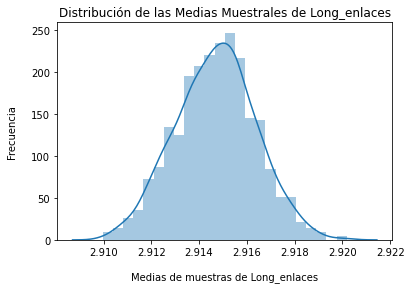

In [26]:
Media_Muestral(data_principal, 'Long_enlaces', 200, 1000)

Ese valor de longitud de enlace esta en unidades de Angstroms, es decir que el valor medio muestral que nos indica la longitud de enlace entre atomos de nanoparticulas de oro es de $2.914 \pm 0.001 \textup{\r{A}}$ el cual no discrepa con los valores enontrados en la biblografia. Tampoco del valor conocido de longitud de enlace para los átomos del oro en bulk que es de $2.8 \pm 0.1$.

#### Disminución longitud de enlace

Además mediante técnicas experimentales se encuentra que a medida que disminuye el tamaño de las nanopartículas metálicas, la longitud del enlace metal-metal tiende a disminuir. En particular que la distancia de enlace del Au evaporado en Mylar de una partícula de radio $30 \textup{\r{A}}$ tiene una distancia de enlace de $2,84 \textup{\r{A}}$, mientras que una partícula de radio $8 \textup{\r{A}}$ tenía una distancia de enlace de $2,72 \textup{\r{A}}$.

Es posible observar esto en la base de datos estudiada

In [27]:
print("Radio  ----> Longitud de enlace ")
print(data_principal["Radio"].min(), "---->", data_principal["Long_enlaces"].min())

print(data_principal["Radio"].max(), "---->", data_principal["Long_enlaces"].max())

Radio  ----> Longitud de enlace 
8.5286 ----> 2.85037
39.2392 ----> 2.96184


Analisis de correlación entre la longitud de enlace y el numero de atomos enla nanoparticula. 

Como no se conoce la distribución y las posibles relaciones entre dos variables, pero si las dos muestras de datos son de  la misma longitud, se utiliza el  coeficiente de correlación de Spearman como  herramienta para validar o rechazar la hipótesis nula de que la composición de la nanopartícula y la longitud de enlace son independientes.

Hipótesis
	 Nula (H0): No exite relación entre N_total y Long_enlaces
	 Alternativa (HA): Sí exite relación entre N_total y Long_enlaces
________________________________________
Nota: 
	Se utiliza un nivel de confianza del 95%
	Es decir que si se obtiene  p_valor < 0.05:
	Se rechaza la H0 y existe una correlación significativa.
	En caso contrario no es posible afirmar que la correlación difiera significativamente de 0.
________________________________________
Coeficientes correlación y P_values
	De Spearman: r=0.2316212366733246, p-value=7.299783711665654e-50
********************************************************************************
Se rechaza H0 
	 Exite correlación significativa entre N_total y Long_enlaces
********************************************************************************


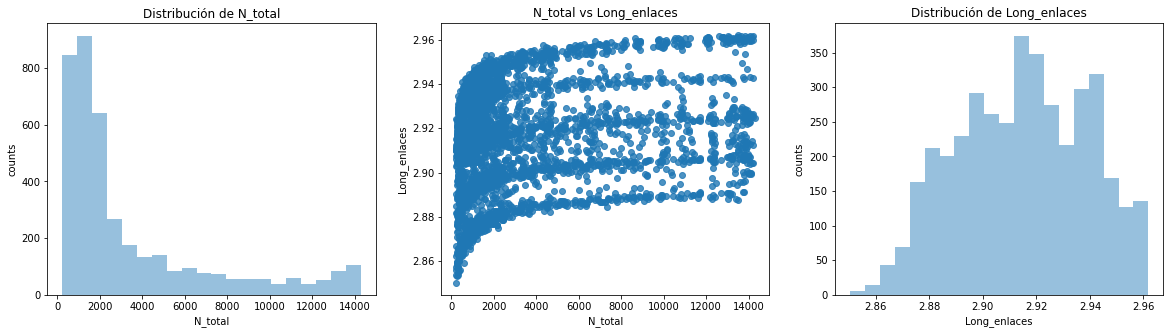

In [28]:
hipotesisCorrelación(data_principal, "N_total", "Long_enlaces",)

Y efectivamente mediante un test de hipotesis y visualmente podemos confirmar que la longitud de enlace disminute al disminuir la cantidad de atomos que conforman la nanoparticula

## COORDINACIÓN

Los átomos del oro en granel adoptan una configuración estructural cúbica centrada en las caras o FCC. Lo que indica una coordicación 12 entre los átomos internos. 

Se analiza si esto se cumple también en el caso de tener estructuras con cantidad de átomos pequeña como las nanopartículas.

In [29]:
coord_bulk = data_principal['Coord_bulk']

Hallamos la media y su desviación estandar

In [30]:
coord_bulk.mean()

12.13831165

In [31]:
coord_bulk.std()

0.1648448591439055

Media de coordiación y su desviación estandar es de :
    $12.1 \pm 0.2$

Esta información tambien era posible hallarla de la tabla de caracteristicas de bulk. Asi que se selecciona dicha base de datos y se analiza la columna de número de átomos a granel con número de coordinación entre 0 a 20 y se observa cual es el valor mas probable.

In [32]:
data_bulk = pd.read_csv("./data/subdata/data_bulk.csv")

In [33]:
data_bulk.head()

,BCN_0,BCN_1,BCN_2,BCN_3,BCN_4,BCN_5,BCN_6,BCN_7,BCN_8,BCN_9,...,q6q6_B12,q6q6_B13,q6q6_B14,q6q6_B15,q6q6_B16,q6q6_B17,q6q6_B18,q6q6_B19,q6q6_B20,q6q6_B20+
0,0,0,0,0,0,0,0,0,0,0,...,30,7,2,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,19,10,2,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,959,247,21,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,2,...,2775,732,117,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,2,9,...,5029,982,136,0,0,0,0,0,0,0


Se emplea el diagrama de tallo  y de hojas de para mostrar la frecuencia absoluta de los diferentes numeros de coordinación.

In [34]:
bcn = data_Au[[i for i in data_bulk if "BCN_" in i]]

Prueba para una sola estructura

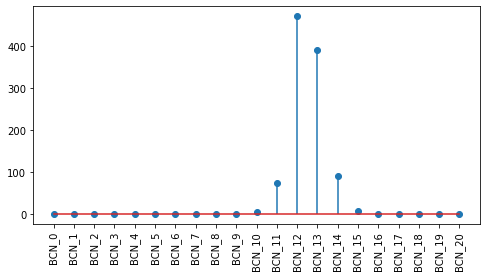

In [35]:
plt.figure(figsize=(8, 4))
cols=[col for col in bcn.columns]
x=np.linspace(0, len(cols)-1, len(cols))
plt.stem(bcn.iloc[1,:])
plt.xticks(x, cols, rotation=90);

El gráfico de diagrama de tallo y hoja es solo adecuado para conjuntos de datos pequeños, por lo que primero se realiza para una muestra aleatoria de 40 configuraciones

Porcentaje de estructuras con mayoría de átomos con coordinación de bulk igual 12: 97.50% 


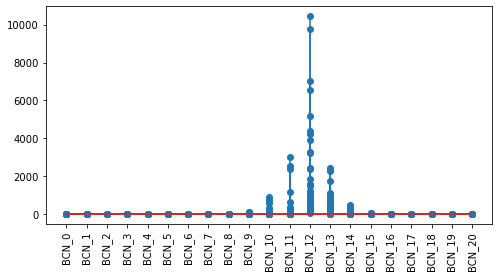

In [36]:
plt.figure(figsize=(8, 4))
cols=[col for col in bcn.columns]
x=np.linspace(0, len(cols)-1, len(cols))
n=random.sample(range(len(bcn)),40)
max_coord_12=0
for i in n:
    plt.stem(bcn.iloc[i,:])
    if bcn.iloc[i,:].max() == bcn.loc[i, "BCN_12"]:
        max_coord_12+=1

porcentaje =  max_coord_12*100/40
print("Porcentaje de estructuras con mayoría de átomos con coordinación de bulk igual 12: {:.2f}% ".format(porcentaje))
plt.xticks(x, cols, rotation=90);

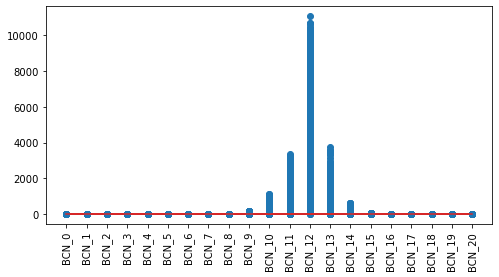

In [37]:
plt.figure(figsize=(8, 4))
cols=[col for col in bcn.columns]
x=np.linspace(0, len(cols)-1, len(cols))
for i in range(0,bcn.shape[0]):
    plt.stem(bcn.iloc[i,:])
plt.xticks(x, cols, rotation=90);

In [38]:
max_coord_12=0
for i in range(0,data_bulk.shape[0]):
    if data_bulk.iloc[i,:].max() == data_bulk.loc[i, "BCN_12"]:
        max_coord_12+=1
porcentaje =  max_coord_12*100/len(data_bulk)
print("Porcentaje de estructuras con coordinación de bulk igual 12: {:.2f}% ".format(porcentaje))


Porcentaje de estructuras con coordinación de bulk igual 12: 71.72% 


Ahora utilizando la sub base de datos de características superficiales.

In [39]:
data_super = pd.read_csv("./data/subdata/data_super.csv")
scn = data_Au[[i for i in data_super if "SCN_" in i]]

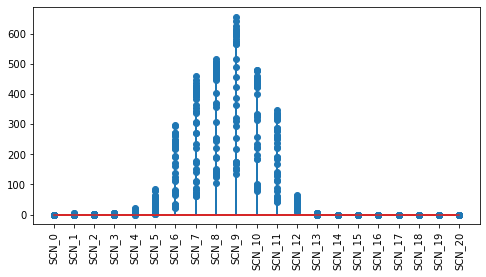

In [40]:
plt.figure(figsize=(8, 4))
cols=[col for col in scn.columns]
x=np.linspace(0, len(cols)-1, len(cols))
for i in range(0,scn.shape[0]//100):
    plt.stem(scn.iloc[i,:])
plt.xticks(x, cols, rotation=90);

Se observa lo esperado de que la coordinación ahora será menor y tendrá más dispersión, alrededor del valor típico de 9 átomos vecinos.

## Energía vs Cantidad de átomos. 

Hipótesis
	 Nula (H0): No exite relación entre N_total y Total_E
	 Alternativa (HA): Sí exite relación entre N_total y Total_E
________________________________________
Nota: 
	Se utiliza un nivel de confianza del 95%
	Es decir que si se obtiene  p_valor < 0.05:
	Se rechaza la H0 y existe una correlación significativa.
	En caso contrario no es posible afirmar que la correlación difiera significativamente de 0.
________________________________________
Coeficientes correlación y P_values
	De Spearman: r=-0.9997337066842367, p-value=0.0
********************************************************************************
Se rechaza H0 
	 Exite correlación significativa entre N_total y Total_E
********************************************************************************


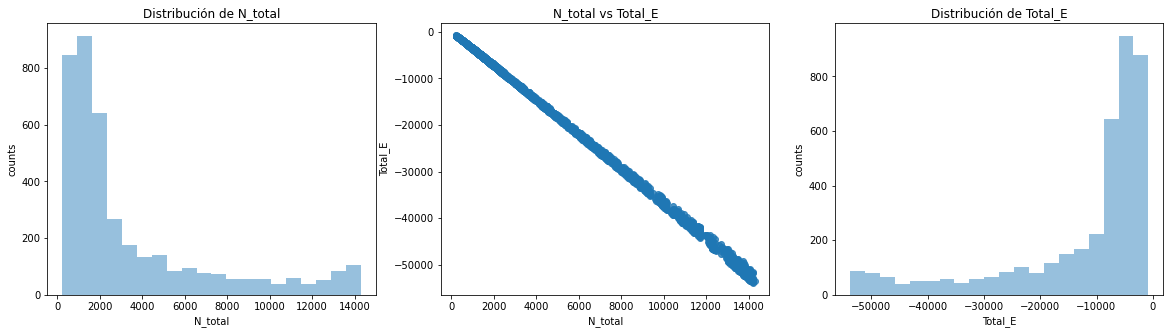

In [41]:
hipotesisCorrelación(data_principal, "N_total", "Total_E")

## ENERGÍA POR ÁTOMO

D'Agostino's K2 test:
	 Estadístico = 173.56178055964725, p-value = 2.0489823473127228e-38
P_Valor < 0.05 -> Se rechaza H0 
	  No es posible asegurar que E_atomo sigue una distribución normal.
********************************************************************************


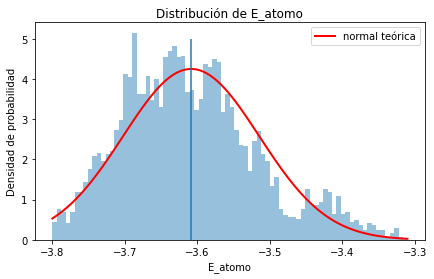

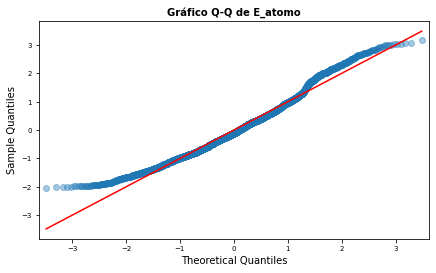

In [124]:
Test_Normalidad(data_principal, "E_atomo")

### Detecteccion de  outliers

********************************************************************************
Se encontraron 49 outliers de E_atomo
********************************************************************************


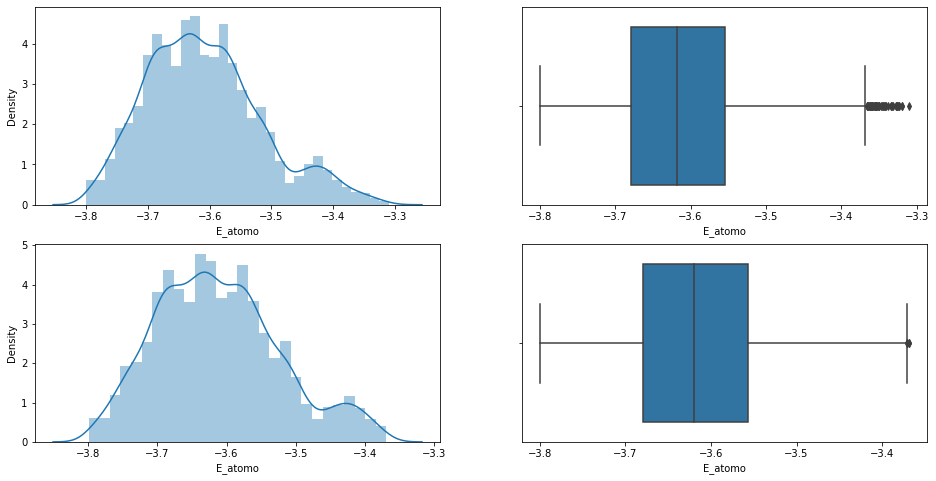

In [433]:
data_limpia=Detectar_Outliers(data_principal, "E_atomo")

Visualmente es posible comprobar que no cambia apreciablemente la distribucion. De todas formas hacemos un test de noermalidad. Si no se acepta hipotesis nula pasamos a utilizar el teorema central del limite

D'Agostino's K2 test:
	 Estadístico = 120.40314209075626, p-value = 7.15797031667494e-27
P_Valor < 0.05 -> Se rechaza H0 
	  No es posible asegurar que E_atomo sigue una distribución normal.
********************************************************************************


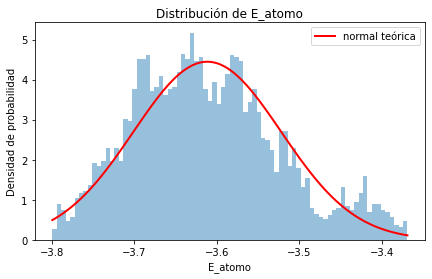

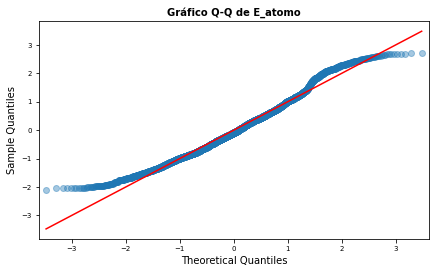

In [434]:
Test_Normalidad(data_limpia, "E_atomo")

********************************************************************************
Media Muestral de E_atomo:  -3.608690898107524
Error Estandar:  0.006634245670964067
********************************************************************************


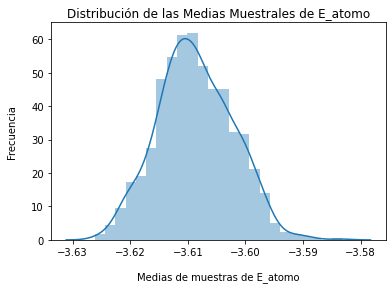

In [425]:
Media_Muestral(data_principal, "E_atomo", 200, 1000)

Realizamos test de hipotesis de correlacion entre energia y cantidad de atomos

Hipótesis
	 Nula (H0): No exite relación entre N_total y E_atomo
	 Alternativa (HA): Sí exite relación entre N_total y E_atomo
________________________________________
Nota: 
	Se utiliza un nivel de confianza del 95%
	Es decir que si se obtiene  p_valor < 0.05:
	Se rechaza la H0 y existe una correlación significativa.
	En caso contrario no es posible afirmar que la correlación difiera significativamente de 0.
________________________________________
Coeficientes correlación y P_values
	De Spearman: r=-0.6637026897514255, p-value=0.0
********************************************************************************
Se rechaza H0 
	 Exite correlación significativa entre N_total y E_atomo
********************************************************************************
********************************************************************************


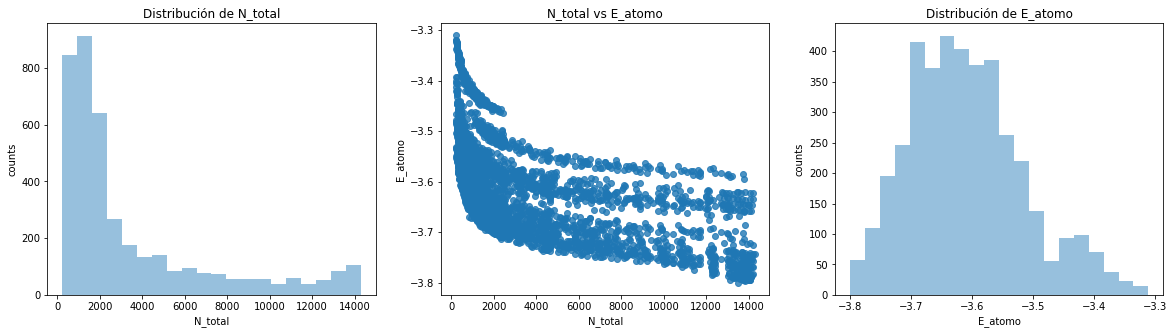

In [445]:
hipotesisCorrelación(data_principal,  "N_total", "E_atomo")

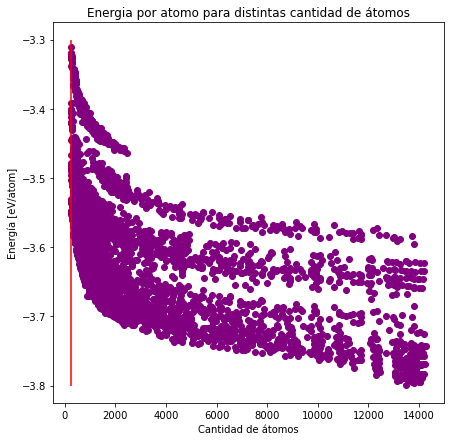

In [44]:
plt.figure(figsize=(7,7))
plt.title("Energia por atomo para distintas cantidad de átomos")
plt.xlabel("Cantidad de átomos")
plt.ylabel("Energía [eV/atom]")
plt.scatter(data_principal['N_total'], data_principal['Total_E']/data_principal['N_total'], color="purple")
plt.vlines(236, -3.8, -3.3, color='red')
plt.show()

## Energía con distintos coordinación

Hipótesis
	 Nula (H0): No exite relación entre Coord_bulk y E_atomo
	 Alternativa (HA): Sí exite relación entre Coord_bulk y E_atomo
________________________________________
Nota: 
	Se utiliza un nivel de confianza del 95%
	Es decir que si se obtiene  p_valor < 0.05:
	Se rechaza la H0 y existe una correlación significativa.
	En caso contrario no es posible afirmar que la correlación difiera significativamente de 0.
________________________________________
Coeficientes correlación y P_values
	De Spearman: r=0.020532452959848933, p-value=0.19417831169915278
********************************************************************************
Se acepta H0 
	 No es posible afirmar correlación significativa entre Coord_bulk y E_atomo
********************************************************************************
********************************************************************************


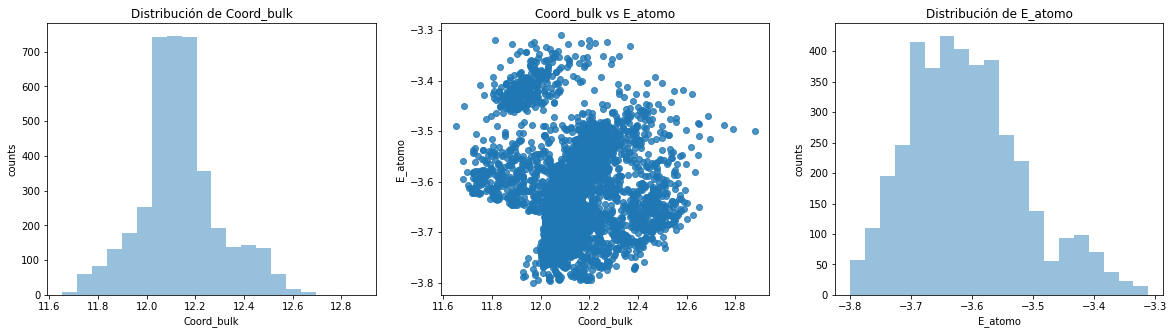

In [446]:
hipotesisCorrelación(data_principal, "Coord_bulk", "E_atomo")

Hipótesis
	 Nula (H0): No exite relación entre Coord_super y E_atomo
	 Alternativa (HA): Sí exite relación entre Coord_super y E_atomo
________________________________________
Nota: 
	Se utiliza un nivel de confianza del 95%
	Es decir que si se obtiene  p_valor < 0.05:
	Se rechaza la H0 y existe una correlación significativa.
	En caso contrario no es posible afirmar que la correlación difiera significativamente de 0.
________________________________________
Coeficientes correlación y P_values
	De Spearman: r=-0.5118793247871645, p-value=4.0938986449225665e-266
********************************************************************************
Se rechaza H0 
	 Exite correlación significativa entre Coord_super y E_atomo
********************************************************************************
********************************************************************************


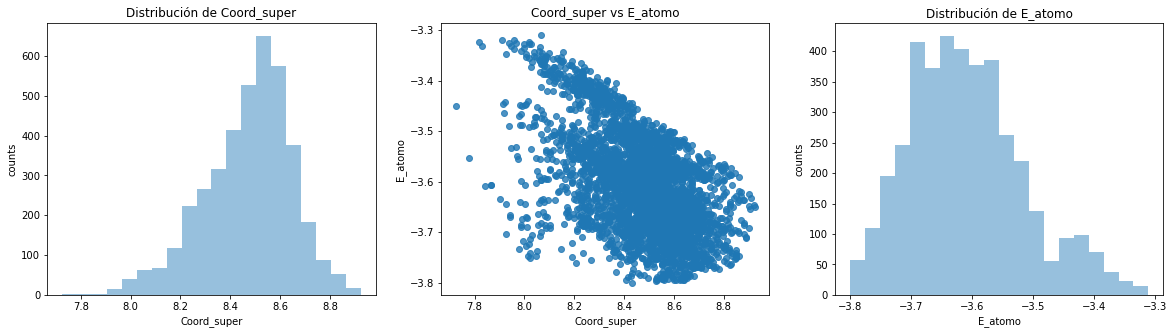

In [447]:
hipotesisCorrelación(data_principal, "Coord_super", "E_atomo")

No es posible afirmar correlación entre energía por átomo y la coordinación de los átomos internos.
Por el contrario, al realizar el análisis de correlación entre la energía por átomo y la coordinación de los átomos superficiales, se obtiene correlación significativa. 


 Pudiendo concluir así que la energía por átomo se ve afectada por el comportamiento de los átomo superficiales de las nanoparticulas. 
